# **Ejemplo 5:** Escalamiento de datos
24_25

In [1]:
# LIBRERÍAS EMPLEADAS EN EL EJEMPLO
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
# Preprocesado
#==============================================================================
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler  # Para el escalamiento Estandarización Z
from sklearn.preprocessing import MinMaxScaler # Para el escalamiento por Rangos
from sklearn.compose import make_column_selector

# Creación del conjunto de datos (dos máquinas embotelladoras)
# ==============================================================================
muA, sigmaA = 1000, 1 # media y desviación estándar embotelladora A
muB, sigmaB = 1000, 4 # media y desviación estándar embotelladora B
datosA = np.random.normal(muA, sigmaA, 1000)
datosB = np.random.normal(muB, sigmaB, 1000)
datos=np.column_stack((datosA, datosB))

# Título: ¿qué es un DataFrame?
#Url: https://datacarpentry.org/python-ecology-lesson-es/02-starting-with-data/#entonces-qu%C3%A9-es-un-dataframe
Data = pd.DataFrame(datos, columns=['Embotelladora_A', 'Embotelladora_B'])

# Escalamiento
# ==============================================================================
# Selección de columnas numéricas
numeric_cols = Data.select_dtypes(include=['float64', 'int']).columns.to_list()
# Standard scaler - Definimos el tipo de escalamientoa realizar: estandarización Z-score
preprocessor_SS = ColumnTransformer(
                   [('scale', StandardScaler(), numeric_cols)],remainder='passthrough')

# MinMaxScaler - Definimos el tipo de escalamiento a realizar: Estandarización por rangos
preprocessor_RR = ColumnTransformer(
                   [('scale', MinMaxScaler(), numeric_cols)],remainder='passthrough')

Data_prep_SS = preprocessor_SS.fit_transform(Data)
Data_prep_RR = preprocessor_RR.fit_transform(Data)
# Nota:
# Se podría aplicar las transformaciones a cualquier conjunto de datos con
# Data_new_prep_SS  = preprocessor_SS.transform(Data_new)
Data_prep_SS_v2  = preprocessor_SS.transform(Data) # Podemos observar que los resultados son los mismos que el método fit_transform

# Título: Diferencia entre fit_transform() y transform() en Scikit-Learn
# Url: https://forum.huawei.com/enterprise/es/diferencia-entre-fit-transform-y-transform-en-scikit-learn/thread/891275-100757

  a) (2 Puntos) ¿Cuánto vale la media, mediana, la desviación estándar muestral, la  varianza muestral y el rango de la variable X?

Media: 5.5
Mediana: 5.5
Varianza muestral: 9.166666666666666
Desviación estándar muestral: 3.0276503540974917
Rango: 9

  b) (1 Punto) Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc...
resultado de df.describe():
               0
count  10.00000
mean    5.50000
std     3.02765
min     1.00000
25%     3.25000
50%     5.50000
75%     7.75000
max    10.00000

  d) (1 Punto) Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.



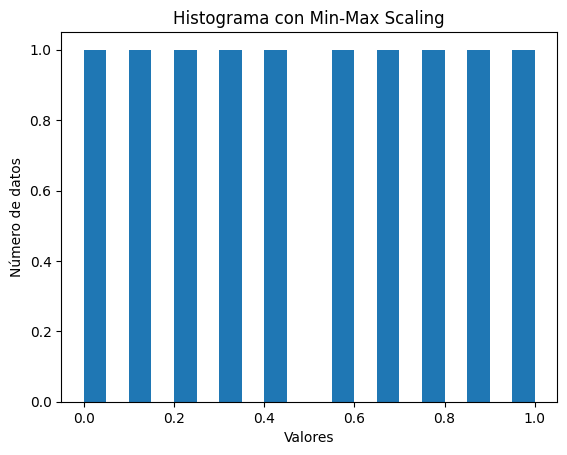

Media de la variable escalada: 0.5
Mediana de la variable escalada: 0.5

  e) (1 Punto) Repetir el apartado anterior con el escalamiento Z - score



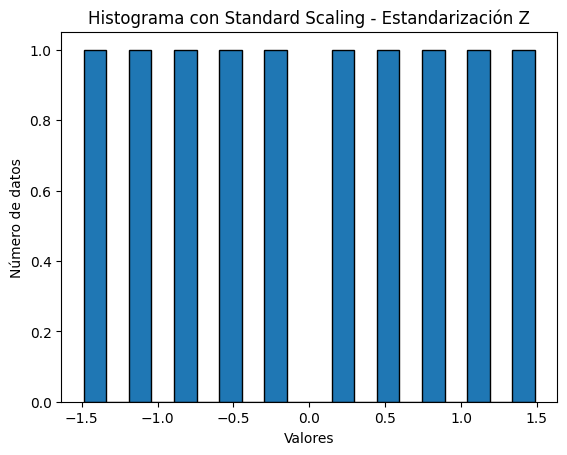

Media de la variable escalada: 4.4408920985006264e-17
Mediana de la variable escalada: 0.0


In [36]:
# ----- EJERCICIOS -----
#Considerar que la variable X toma los valores 1,2,3,4,5,6,7,8,9,10. Se pide: 
#a) (2 Puntos) ¿Cuánto vale la media, mediana, la desviación estándar muestral, la  varianza muestral y el rango de la variable X?
import numpy as np
import pandas as pd

# Valores de la variable X
print("  a) (2 Puntos) ¿Cuánto vale la media, mediana, la desviación estándar muestral, la  varianza muestral y el rango de la variable X?\n")
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
df = pd.DataFrame(X)
# Cálculos
media = np.mean(X)
mediana = np.median(X)
varianza_muestral = np.var(X, ddof=1)  # ddof=1 para la varianza muestral
desviacion_estandar_muestral = np.std(X, ddof=1)  # ddof=1 para la desviación estándar muestral
rango = np.ptp(X)  # Diferencia entre el máximo y el mínimo
print(f"Media: {media}")
print(f"Mediana: {mediana}")
print(f"Varianza muestral: {varianza_muestral}")
print(f"Desviación estándar muestral: {desviacion_estandar_muestral}")
print(f"Rango: {rango}")

#b) (1 Punto) Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc...
print("\n  b) (1 Punto) Utilizar la función describe() de Panda, para obtener la media, desviación estándar, etc...")
print("resultado de df.describe():\n",df.describe())  #Lo imprimo porque de otra forma no se ve el resultado


#c) (1 Punto)¿Por qué el resultado de calcular la desviación estándar con Numpy es diferente a la calculada por describe de Panda? 
# ¿Qué ajuste sería necesario realizar para que los resultados fuesen similares/iguales?
# Respuesta: 
    # En estadística, la "desviación estándar de la muestra" se calcula usando N-1 en el denominador, lo que se llama "corrección de Bessel". 
    # Esto corrige el sesgo hacia valores más bajos cuando se usa la media de la muestra en lugar de la media real de la población. 
    # Aunque la estimación sigue estando sesgada, es menos sesgada que sin la corrección. Para aplicar esta corrección en pandas, se usa ddof=1.

#d) (1 Punto) Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.

print("\n  d) (1 Punto) Estandarizar la variable (escalamiento) mediante rangos y a continuación calcular la media y la mediana de la variable escalada.\n")
dfX = pd.DataFrame(X)

# Escalamiento mediante rangos
X_min = dfX.min()
X_max = dfX.max()
X_escalado = (dfX - X_min) / (X_max - X_min)

# Crear el histograma
plt.hist(X_escalado, bins=20)
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma con Min-Max Scaling')
plt.show()

# Calcular la media y la mediana de la variable escalada
media = np.mean(X_escalado)
mediana = np.median(X_escalado)

print(f'Media de la variable escalada: {media}')
print(f'Mediana de la variable escalada: {mediana}')



#e) (1 Punto) Repetir el apartado anterior con el escalamiento Z - score
print("\n  e) (1 Punto) Repetir el apartado anterior con el escalamiento Z - score\n")
# Estandarización Z
X_mean = dfX.mean()
X_std = dfX.std()
X_escalado = (dfX - X_mean) / X_std

# Crear el histograma
plt.hist(X_escalado, bins=20, edgecolor='black')
plt.ylabel('Número de datos')
plt.xlabel('Valores')
plt.title('Histograma con Standard Scaling - Estandarización Z')
plt.show()

# Calcular la media y la mediana de la variable escalada
media = np.mean(X_escalado)
mediana = np.median(X_escalado)

print(f'Media de la variable escalada: {media}')
print(f'Mediana de la variable escalada: {mediana}')



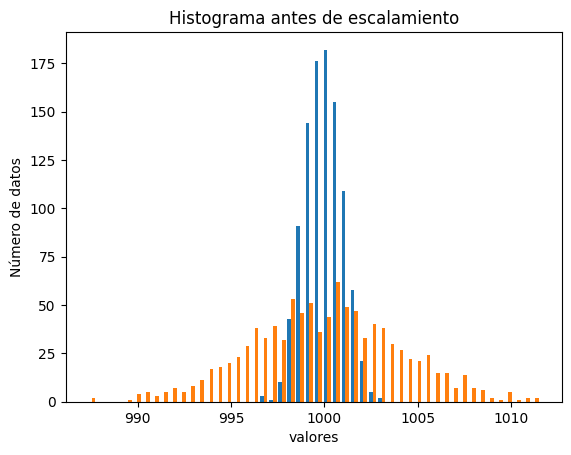

In [ ]:
# Histograma antes de escalamiento
plt.hist(Data, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma antes de escalamiento')
plt.show()

Representacióón de los datos escalado con **Standard Scaler**
 - Estandariación/Escalamiento por desviación típica


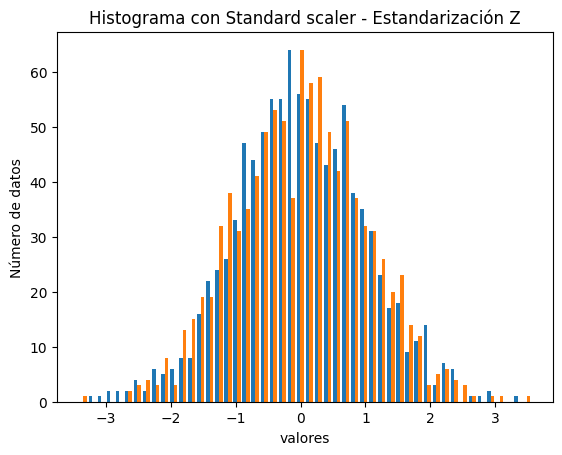

In [2]:
plt.hist(Data_prep_SS, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con Standard scaler - Estandarización Z')
plt.show()

**NOTA** Observar que las **dos** variables tienen la misma desviación típica (s=1)

In [3]:
Data_prep_SS.std()


np.float64(0.9999999999999998)

Representación de los datos escalado con **Min Max Scaler** - Estandariación/Escalamiento por rangos



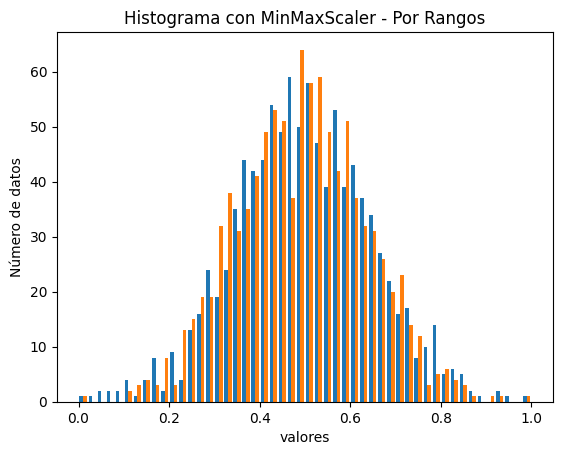

In [ ]:
plt.hist(Data_prep_RR, 50)
plt.ylabel('Número de datos')
plt.xlabel('valores')
plt.title('Histograma con MinMaxScaler - Por Rangos')
plt.show()

**NOTA** Observar que las **dos** variables tienen el mismo rango

In [5]:
#Rango
#Data_prep_RR[:,0]
np.max(Data_prep_RR[:,0])-np.min(Data_prep_RR[:,0])

np.float64(1.0)

In [6]:
#Rango
#Data_prep_RR[:,1]
np.max(Data_prep_RR[:,1])-np.min(Data_prep_RR[:,1])

np.float64(1.0)